# Quantum Perceptron

The following notebook contains the Python 3.6.6 implementation of the quantum perceptron algorithm in the one and two qubit cases. We considered the variant of the classical perceptron algorithm with binary inputs and weights i.e. {-1, 1}. The quantum perceptron algorithm used in this implementation is discussed in detail here : https://arxiv.org/abs/1811.02266. We considered both approaches i.e. using sign-flip blocks and using the hypergraph state generation subroutine in order to implement the algorithm. Note that only the forward procedure of the perceptron algorithm is considered since the backpropagation of error and gradient descent to optimize weights is still and open problem.

## API Access Setup

In order to build and execute programs on the IBM Q machine or local simulators, we need to have authorized access to the machine. The access can be requested through the IBM Q website by creating an IBMid. Once the access is gained, the  python library Qiskit can be used to develop and execute programs locally on simulators or remotely on the IBM Q backends.

In [2]:
###############################################
# Import the system and python libraries to 
# handle path and backend management 
###############################################

# System library to be used for path management
from os import path

# Configuration file parser
from configparser import ConfigParser

# Basic qiskit modules
from qiskit import available_backends, execute, register, least_busy

In [3]:
# Print the home directory path
user_home_dir = str(path.expanduser('~'))
print('Home directory for the current user : ', user_home_dir)

# Local path to the configuration file
config_path = 'Documents\\GitHub\\Quantum-Notebooks\\API.cfg'

# Get the correct POSIX path of the configuration file
configFilePath = path.join(user_home_dir, config_path)
print("The configuration file currently being read " + str(configFilePath))
        
# Setup the configuration reader file buffer
configReader = ConfigParser()
configReader.read(configFilePath)
        
# Get the APItoken and the URL from the configuration file and list all
# the available backends from IBM Q
try:
    # Read in the API token and the URL, and register
    register(configReader.get('API', 'APItoken'), configReader.get('API', 'URL'))
except: 
    print('Error. Invalid token or URL entered')

Home directory for the current user :  C:\Users\Alpha
The configuration file currently being read C:\Users\Alpha\Documents\GitHub\Quantum-Notebooks\API.cfg


In [4]:
# List the remote actual Q backends
print('The list of available remote Q backends for this API token', available_backends({'local': False, 'simulator': False}))

# List the remote simulator backends
print('The list of available remote simulator backends for this API token', available_backends({'local': False, 'simulator': True}))

# List the local actual Q backends
print('The list of available local Q backends for this API token', available_backends({'local': True, 'simulator': False}))

# List the local simulator backends
print('The list of available local simulator backends for this API token', available_backends({'local': True, 'simulator': True}))

The list of available remote Q backends for this API token ['ibmq_16_melbourne', 'ibmqx2', 'ibmqx4']
The list of available remote simulator backends for this API token ['ibmq_qasm_simulator']
The list of available local Q backends for this API token []
The list of available local simulator backends for this API token ['local_qasm_simulator', 'local_statevector_simulator', 'local_unitary_simulator']


Any of the above available backends can be used in order to execute the quantum program developed.

## Algorithm

The implementation is based on the algorithm and approaches discussed in the article given below :

In [5]:
# Show the pdf file using the IPython library
from IPython.display import HTML
HTML('<iframe src=https://arxiv.org/pdf/1811.02266.pdf width=980 height=1000></iframe>')

Import the essential python libraries to construct the circuits and display the results ( outputs ) of the perceptron algorithm.

In [6]:
# Import the QisKit modules to develop the circuit

# Basic qiskit modules
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute

# Basic visualiztion tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

## 1. One Qubit Case

A single qubit in a superposition is able to represent two binary input or binary weights simultaneously in the phase of the two basis states 0 and 1. Even this trivial case shows the inherent parallel power of quantum computing which lies in exploiting quantum phenomena such as quantum superposition and entanglement.

We will consider four cases similar to the implementation of the classical perceptron algorithm with the following input and weight configurations :

1 : i_0 = 1, i_1 = 1 and w_0 = 1, w_1 = 1

2 : i_0 = 1, i_1 = -1 and w_0 = 1, w_1 = 1

3 : i_0 = 1, i_1 = 1 and w_0 = 1, w_1 = -1

4 : i_0 = 1, i_1 = -1 and w_0 = 1, w_1 = -1

Note that the algorithm requires an ancilla qubit to store the output of the dot product. Therefore, for the single qubit case we actually use two qubits ( one operational and one ancilla ).

We will first consider running the algorithm on simulators on the local machine.

In [7]:
# Determine the least busy local simulator backend
least_busy_backend = least_busy(available_backends({'simulator': True, 'local': True}))
print('The least busy available local simulator backend is', least_busy_backend)

The least busy available local simulator backend is local_qasm_simulator_cpp


### Case 1
i_0 = 1, i_1 = 1 and w_0 = 1, w_1 = 1

Construct the quantum circuit :

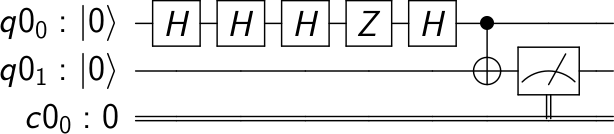

In [8]:
# Initialize the Quantum Circuit

# Number of quantum registers
qreg = 2

# Number of classical registers
creg = 1

# Create a quantum register "qr" with qreg qubits
qr = QuantumRegister(qreg)

# Create a classical register called "cr" with creg bits
cr = ClassicalRegister(creg)

# Create a Quantum Circuit involving "qr" and "cr"
circuit_1 = QuantumCircuit(qr, cr)

# Add the operations to the Quantum circuit 

# Add a Hadamard gate to put the single qubit in a superposition
circuit_1.h(qr[0])

# Apply a Hadamard gate to neutralize the application of the weight unitary matrix
circuit_1.h(qr[0])

# Apply a NOT to put the qubits in the state |m-1> which stores the result of the dot product
circuit_1.h(qr[0])
circuit_1.z(qr[0])
circuit_1.h(qr[0])

# Apply the controlled not on the original qubit and the ancilla
circuit_1.cx(qr[0], qr[1])
    
# Measure the last qubit in the sequence
circuit_1.measure(qr[1], cr[0])

# Draw the given circuit
circuit_drawer(circuit_1)

Execute the quantum circuit :

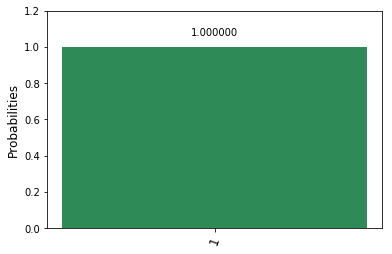

In [9]:
# Create a Quantum Program for execution 
job = execute(circuit_1, least_busy_backend)

# Get the result and plot the result
result = job.result()
counts = result.get_counts(circuit_1)
plot_histogram(counts)

### Case 2
i_0 = 1, i_1 = -1 and w_0 = 1, w_1 = 1

Construct the quantum circuit :

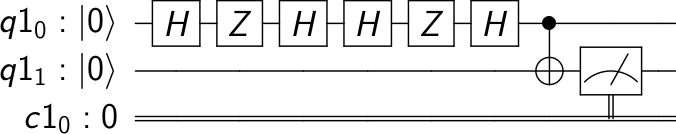

In [10]:
# Initialize the Quantum Circuit

# Number of quantum registers
qreg = 2

# Number of classical registers
creg = 1

# Create a quantum register "qr" with qreg qubits
qr = QuantumRegister(qreg)

# Create a classical register called "cr" with creg bits
cr = ClassicalRegister(creg)

# Create a Quantum Circuit involving "qr" and "cr"
circuit_1 = QuantumCircuit(qr, cr)

# Add the operations to the Quantum circuit 

# Add a Hadamard gate to put the single qubit in a superposition
circuit_1.h(qr[0])

# Apply the unitary matrix for the input ( Apply a -1 phase to the second qubit )
circuit_1.z(qr[0])

# Apply a Hadamard gate to neutralize the application of the weight unitary matrix
circuit_1.h(qr[0])

# Apply a NOT to put the qubits in the state |m-1>
circuit_1.h(qr[0])
circuit_1.z(qr[0])
circuit_1.h(qr[0])

# Apply the controlled not on the original qubit and the ancilla
circuit_1.cx(qr[0], qr[1])
    
# Measure the last qubit in the sequence
circuit_1.measure(qr[1], cr[0])

# Draw the given circuit
circuit_drawer(circuit_1)

Execute the quantum circuit :

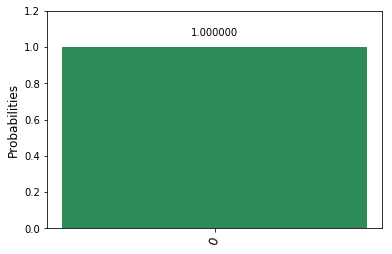

In [11]:
# Create a Quantum Program for execution 
job = execute(circuit_1, least_busy_backend)

# Get the result and plot the result
result = job.result()
counts = result.get_counts(circuit_1)
plot_histogram(counts)

### Case 3
i_0 = 1, i_1 = 1 and w_0 = 1, w_1 = -1

Construct the quantum circuit :

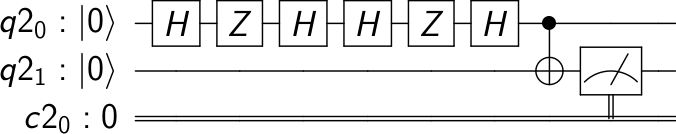

In [12]:
# Initialize the Quantum Circuit

# Number of quantum registers
qreg = 2

# Number of classical registers
creg = 1

# Create a quantum register "qr" with qreg qubits
qr = QuantumRegister(qreg)

# Create a classical register called "cr" with creg bits
cr = ClassicalRegister(creg)

# Create a Quantum Circuit involving "qr" and "cr"
circuit_1 = QuantumCircuit(qr, cr)

# Add the operations to the Quantum circuit 

# Add a Hadamard gate to put the single qubit in a superposition
circuit_1.h(qr[0])

# Apply the unitary matrix for the weight ( Apply a -1 phase to the second qubit )
circuit_1.z(qr[0])

# Apply a Hadamard gate to neutralize the application of the weight unitary matrix
circuit_1.h(qr[0])

# Apply a NOT to put the qubits in the state |m-1>
circuit_1.h(qr[0])
circuit_1.z(qr[0])
circuit_1.h(qr[0])

# Apply the controlled not on the original qubit and the ancilla
circuit_1.cx(qr[0], qr[1])
    
# Measure the last qubit in the sequence
circuit_1.measure(qr[1], cr[0])

# Draw the given circuit
circuit_drawer(circuit_1)

Execute the quantum circuit :

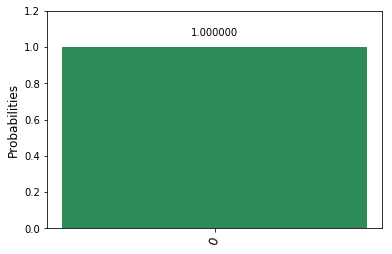

In [13]:
# Create a Quantum Program for execution 
job = execute(circuit_1, least_busy_backend)

# Get the result and plot the result
result = job.result()
counts = result.get_counts(circuit_1)
plot_histogram(counts)

### Case 4
i_0 = 1, i_1 = -1 and w_0 = 1, w_1 = -1

Construct the quantum circuit :

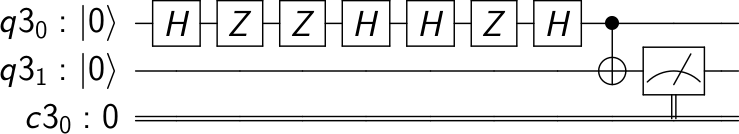

In [14]:
# Initialize the Quantum Circuit

# Number of quantum registers
qreg = 2

# Number of classical registers
creg = 1

# Create a quantum register "qr" with qreg qubits
qr = QuantumRegister(qreg)

# Create a classical register called "cr" with creg bits
cr = ClassicalRegister(creg)

# Create a Quantum Circuit involving "qr" and "cr"
circuit_1 = QuantumCircuit(qr, cr)

# Add the operations to the Quantum circuit 

# Add a Hadamard gate to put the single qubit in a superposition
circuit_1.h(qr[0])

# Apply the unitary matrix for the input ( Apply a -1 phase to the second qubit )
circuit_1.z(qr[0])

# Apply the unitary matrix for the weight ( Apply a -1 phase to the second qubit )
circuit_1.z(qr[0])

# Apply a Hadamard gate to neutralize the application of the weight unitary matrix
circuit_1.h(qr[0])

# Apply a NOT to put the qubits in the state |m-1>
circuit_1.h(qr[0])
circuit_1.z(qr[0])
circuit_1.h(qr[0])

# Apply the controlled not on the original qubit and the ancilla
circuit_1.cx(qr[0], qr[1])
    
# Measure the last qubit in the sequence
circuit_1.measure(qr[1], cr[0])

# Draw the given circuit
circuit_drawer(circuit_1)

Execute the quantum circuit :

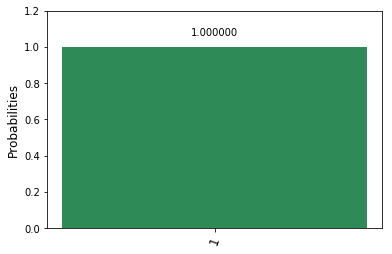

In [15]:
# Create a Quantum Program for execution 
job = execute(circuit_1, least_busy_backend)

# Get the result and plot the result
result = job.result()
counts = result.get_counts(circuit_1)
plot_histogram(counts)

## 2. Two Qubit Case

Although the two approaches to implement a quantum perceptron i.e. using Sign-Flip blocks and HSGS (Hypergraph State Generation Subroutine) are equivalent for the single qubit case, they differ greatly in the two qubit case.

We will consider the four cases similar to the implementation of the classical perceptron algorithm with the following input and weight configurations :

1 : i_0 = 1, i_1 = 1, i_2 = 1, i_3 = 1 and w_0 = 1, w_1 = 1, w_2 = 1, w_3 = 1

2 : i_0 = 1, i_1 = -1, i_2 = -1, i_3 = -1 and w_0 = 1, w_1 = 1, w_2 = 1, w_3 = 1

3 : i_0 = 1, i_1 = 1, i_2 = 1, i_3 = -1 and w_0 = 1, w_1 = -1, w_2 = -1, w_3 = -1

4 : i_0 = 1, i_1 = 1, i_2 = -1, i_3 = -1 and w_0 = 1, w_1 = -1, w_2 = -1, w_3 = -1

### a. Using Sign Flip Blocks

### Case 1

i_0 = 1, i_1 = 1, i_2 = 1, i_3 = 1 and w_0 = 1, w_1 = 1, w_2 = 1, w_3 = 1

Construct the quantum circuit :

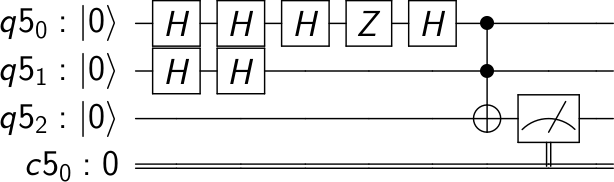

In [20]:
# Initialize the Quantum Circuit

# Number of quantum registers
qreg = 3

# Number of classical registers
creg = 1

# Create a quantum register "qr" with qreg qubits
qr = QuantumRegister(qreg)

# Create a classical register called "cr" with creg bits
cr = ClassicalRegister(creg)

# Create a Quantum Circuit involving "qr" and "cr"
circuit_1 = QuantumCircuit(qr, cr)

# Add the operations to the Quantum circuit 

# Add a Hadamard gate to put the two qubit in a superposition
circuit_1.h(qr[0])
circuit_1.h(qr[1])

# Apply the unitary matrix for the input

# No operations needed since the qubits are already in the desired superposition

# Apply a Hadamard gate to neutralize the application of the weight unitary matrix
circuit_1.h(qr[0])
circuit_1.h(qr[1])

# Apply a NOT to put the qubits in the state |m-1>
circuit_1.h(qr[0])
circuit_1.z(qr[0])
circuit_1.h(qr[0])

# Apply the controlled not on the original qubit and the ancilla
circuit_1.ccx(qr[0], qr[1], qr[2])
    
# Measure the last qubit in the sequence
circuit_1.measure(qr[2], cr[0])

# Draw the given circuit
circuit_drawer(circuit_1)

Execute the quantum circuit :

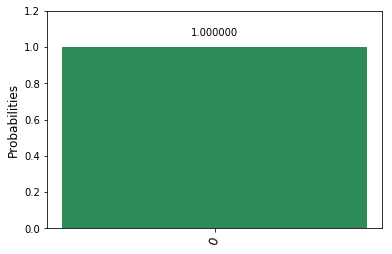

In [21]:
# Create a Quantum Program for execution 
job = execute(circuit_1, least_busy_backend)

# Get the result and plot the result
result = job.result()
counts = result.get_counts(circuit_1)
plot_histogram(counts)

### Case 2 

i_0 = 1, i_1 = -1, i_2 = -1, i_3 = -1 and w_0 = 1, w_1 = 1, w_2 = 1, w_3 = 1

Construct the quantum circuit :

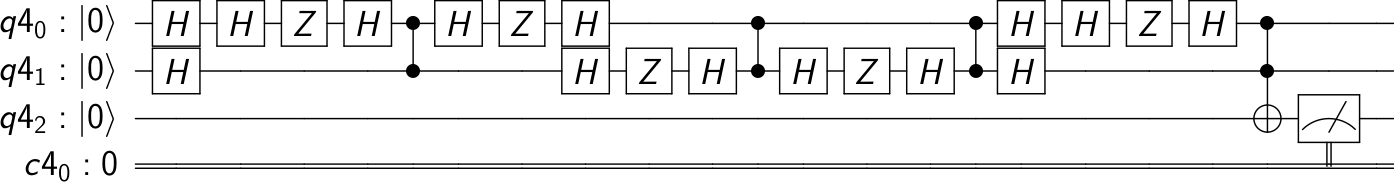

In [16]:
# Initialize the Quantum Circuit

# Number of quantum registers
qreg = 3

# Number of classical registers
creg = 1

# Create a quantum register "qr" with qreg qubits
qr = QuantumRegister(qreg)

# Create a classical register called "cr" with creg bits
cr = ClassicalRegister(creg)

# Create a Quantum Circuit involving "qr" and "cr"
circuit_1 = QuantumCircuit(qr, cr)

# Add the operations to the Quantum circuit 

# Add a Hadamard gate to put the two qubit in a superposition
circuit_1.h(qr[0])
circuit_1.h(qr[1])

# Apply the unitary matrix for the input ( Apply a -1 phase to the second, third and fourth basis )

# Applying the -1 phase to the second basis state |1> = |01>
circuit_1.h(qr[0])
circuit_1.z(qr[0])
circuit_1.h(qr[0])

circuit_1.cz(qr[0], qr[1])

circuit_1.h(qr[0])
circuit_1.z(qr[0])
circuit_1.h(qr[0])

# Applying the -1 phase to the third basis state |2> = |10>
circuit_1.h(qr[1])
circuit_1.z(qr[1])
circuit_1.h(qr[1])

circuit_1.cz(qr[1], qr[0])

circuit_1.h(qr[1])
circuit_1.z(qr[1])
circuit_1.h(qr[1])

# Applying the -1 phase to the fourth basis state |3> = |11>
circuit_1.cz(qr[0], qr[1])

# Apply a Hadamard gate to neutralize the application of the weight unitary matrix
circuit_1.h(qr[0])
circuit_1.h(qr[1])

# Apply a NOT to put the qubits in the state |m-1>
circuit_1.h(qr[0])
circuit_1.z(qr[0])
circuit_1.h(qr[0])

# Apply the controlled not on the original qubit and the ancilla
circuit_1.ccx(qr[0], qr[1], qr[2])
    
# Measure the last qubit in the sequence
circuit_1.measure(qr[2], cr[0])

# Draw the given circuit
circuit_drawer(circuit_1)

Execute the quantum circuit :

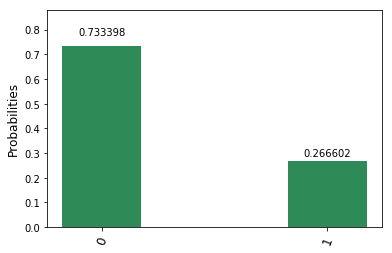

In [18]:
# Create a Quantum Program for execution 
job = execute(circuit_1, least_busy_backend)

# Get the result and plot the result
result = job.result()
counts = result.get_counts(circuit_1)
plot_histogram(counts)

### Case 3 :

i_0 = 1, i_1 = 1, i_2 = -1, i_3 = 1 and w_0 = 1, w_1 = -1, w_2 = -1, w_3 = -1

Construct the quantum circuit :

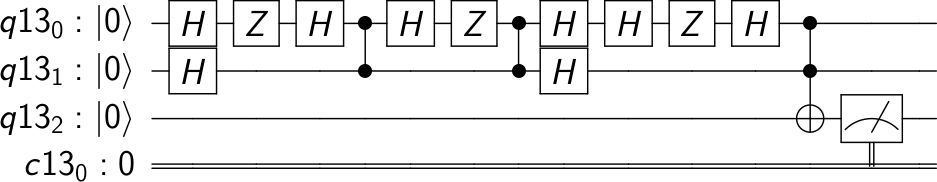

In [36]:
# Initialize the Quantum Circuit

# Number of quantum registers
qreg = 3

# Number of classical registers
creg = 1

# Create a quantum register "qr" with qreg qubits
qr = QuantumRegister(qreg)

# Create a classical register called "cr" with creg bits
cr = ClassicalRegister(creg)

# Create a Quantum Circuit involving "qr" and "cr"
circuit_1 = QuantumCircuit(qr, cr)

# Add the operations to the Quantum circuit 

# Add a Hadamard gate to put the two qubit in a superposition
circuit_1.h(qr[0])
circuit_1.h(qr[1])

# Apply the unitary matrix for the input ( Apply a -1 phase to the second, third and fourth basis )

# Apply the unitary matrix for the weight ( Apply as -1 phase to the second and fourth basis )

# Applying the -1 phase to the second basis state |1> = |01>
circuit_1.z(qr[0])
circuit_1.h(qr[0])

circuit_1.cz(qr[0], qr[1])

circuit_1.h(qr[0])
circuit_1.z(qr[0])

# Applying the -1 phase to the fourth basis state |3> = |11>
circuit_1.cz(qr[0], qr[1])

# Apply a Hadamard gate to neutralize the application of the weight unitary matrix
circuit_1.h(qr[0])
circuit_1.h(qr[1])

# Apply a NOT to put the qubits in the state |m-1>
circuit_1.h(qr[0])
circuit_1.z(qr[0])
circuit_1.h(qr[0])

# Apply the controlled not on the original qubit and the ancilla
circuit_1.ccx(qr[0], qr[1], qr[2])
    
# Measure the last qubit in the sequence
circuit_1.measure(qr[2], cr[0])

# Draw the given circuit
circuit_drawer(circuit_1)

Execute the quantum circuit :

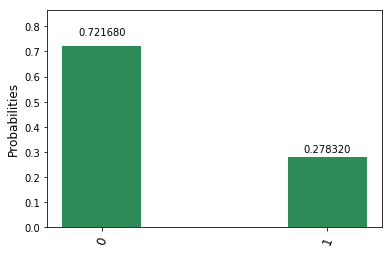

In [37]:
# Create a Quantum Program for execution 
job = execute(circuit_1, least_busy_backend)

# Get the result and plot the result
result = job.result()
counts = result.get_counts(circuit_1)
plot_histogram(counts)